In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
def plot_variable_distributions(df):
    # Set style
    sns.set(style="whitegrid")

    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Plot numerical variable distributions
    for col in num_cols:
        print(len(col),'1')
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    # Plot categorical variable counts
    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        df[col].value_counts().plot(kind='bar', color='salmon')
        plt.title(f'Count of Categories in {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()





3 1


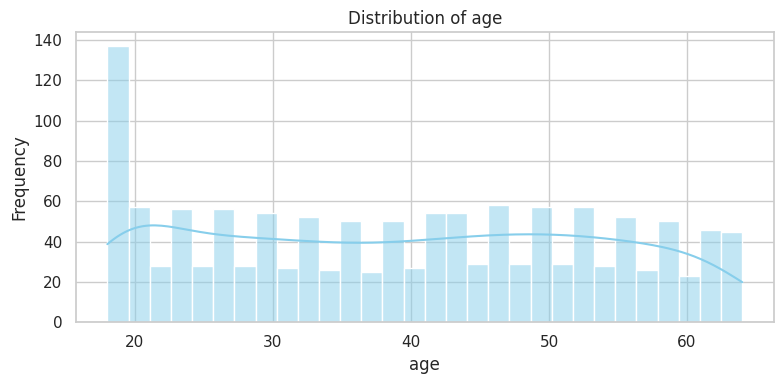

3 1


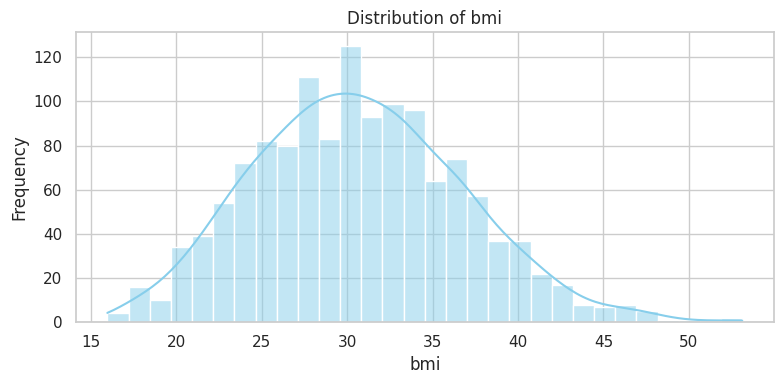

8 1


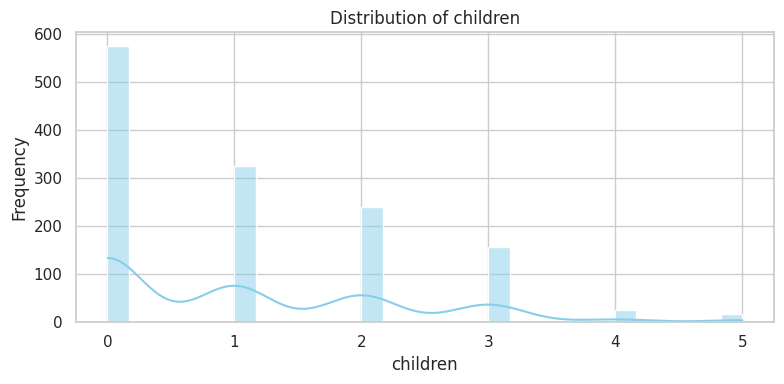

7 1


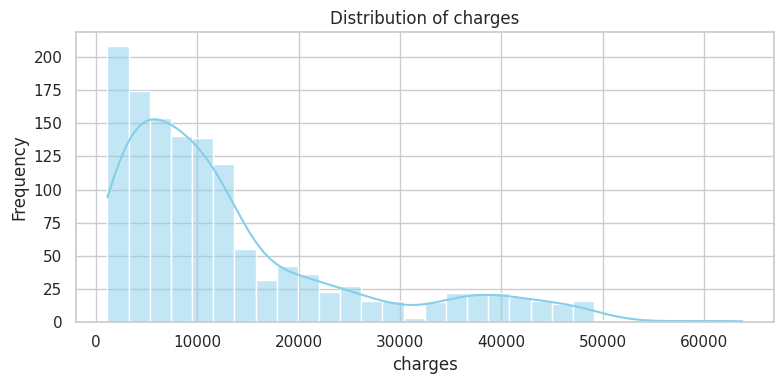

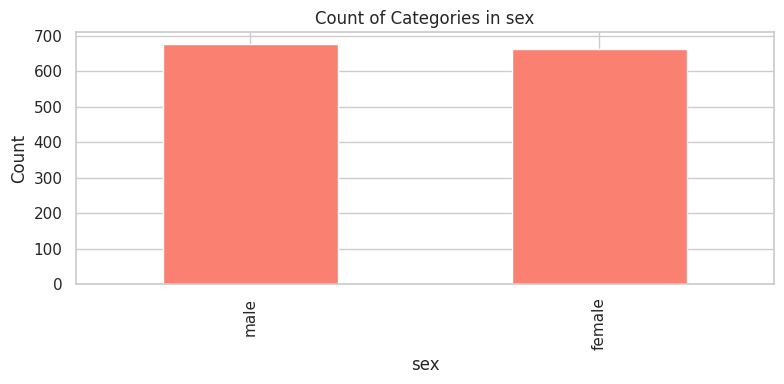

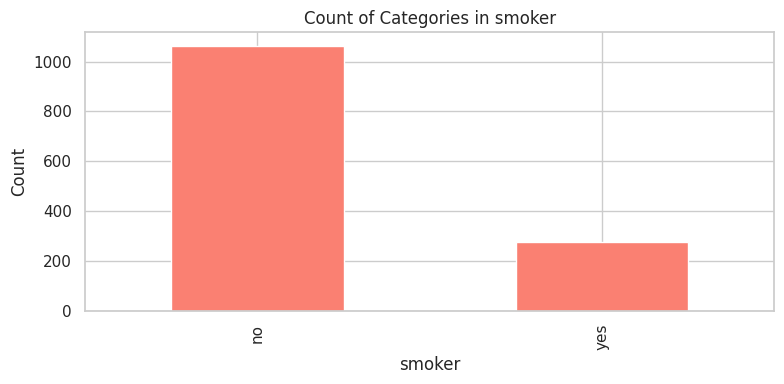

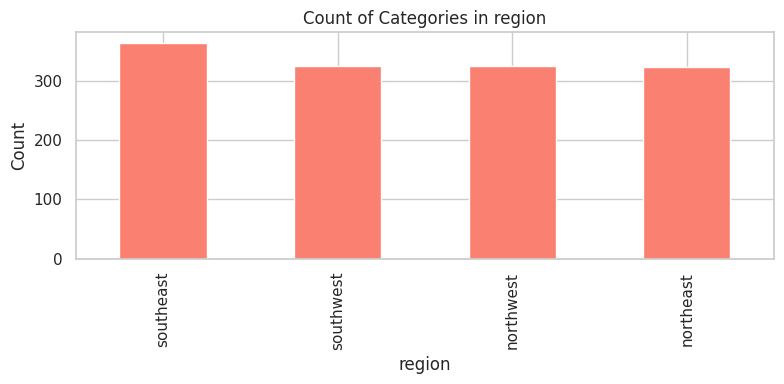

In [ ]:
plot_variable_distributions(df)

In [ ]:

# Assuming 'df' is your DataFrame
null_summary = df.isnull().sum()

# Filter columns with at least one missing value
null_columns = null_summary[null_summary > 0]

# Display result
if not null_columns.empty:
    print("Columns with missing values:\n")
    print(null_columns)
else:
    print("No missing values found in any column.")


No missing values found in any column.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


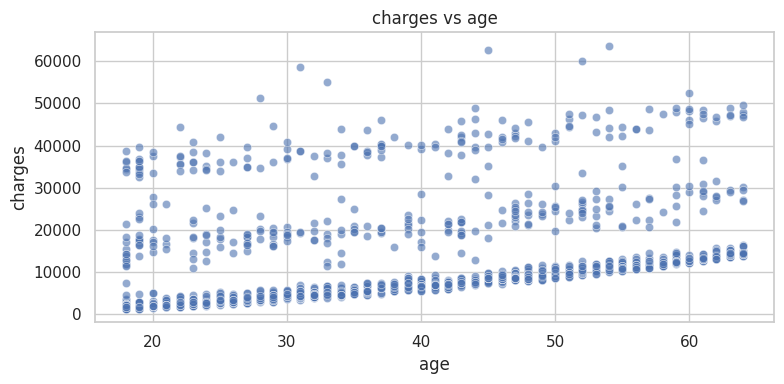

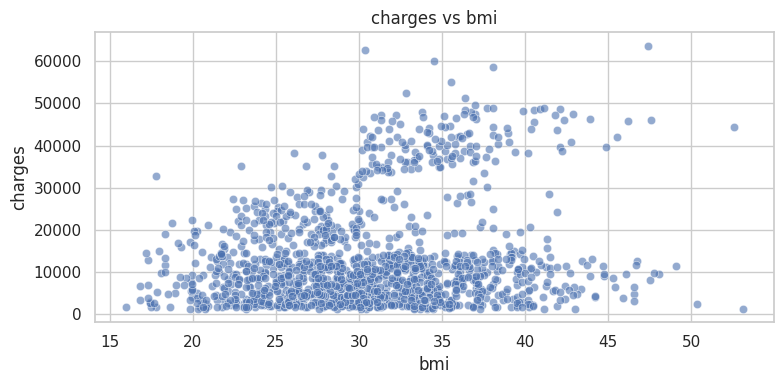

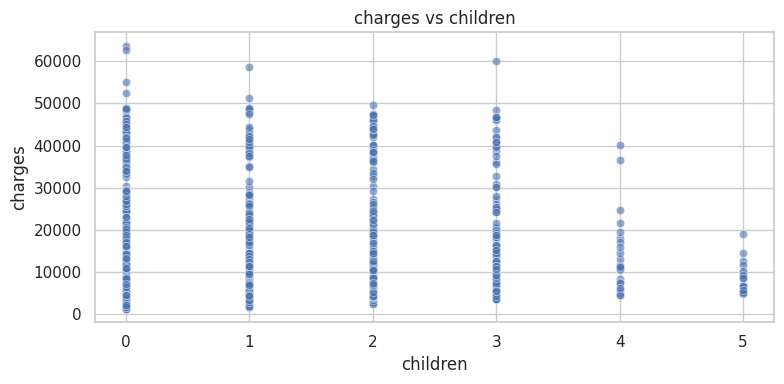

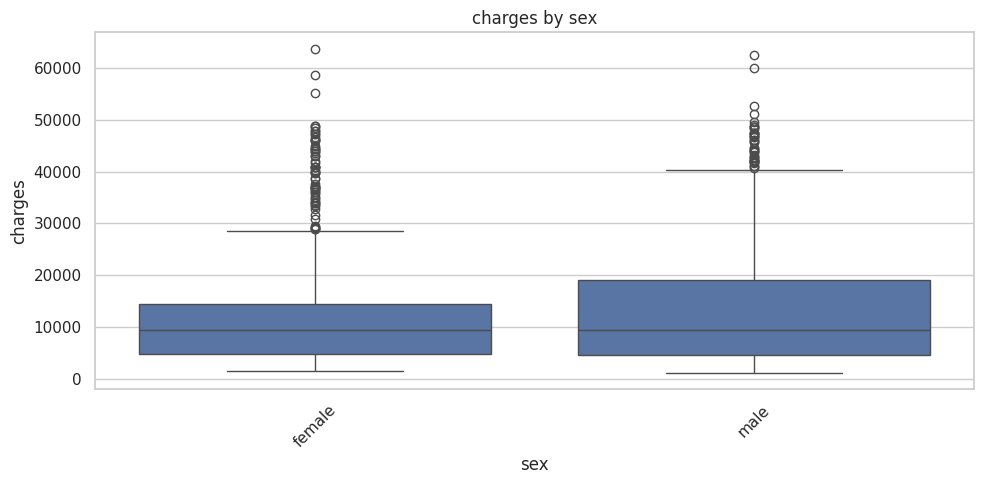

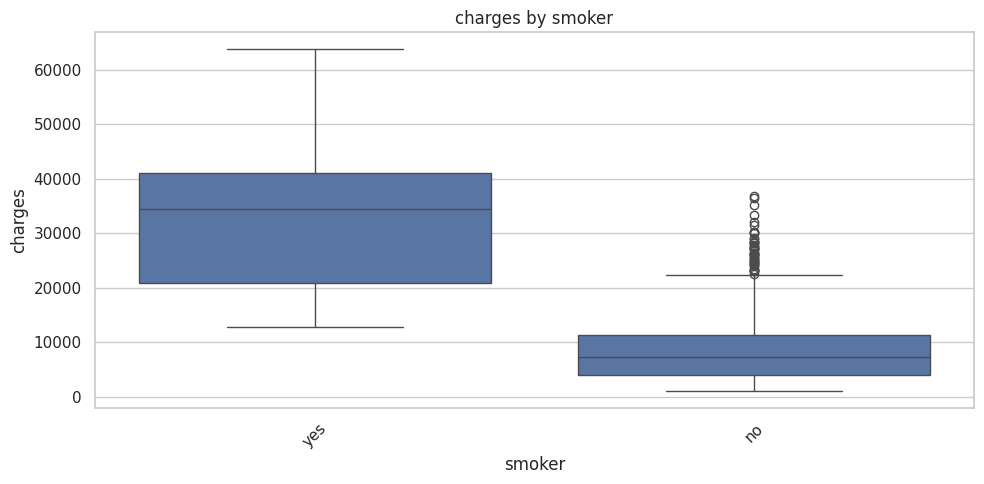

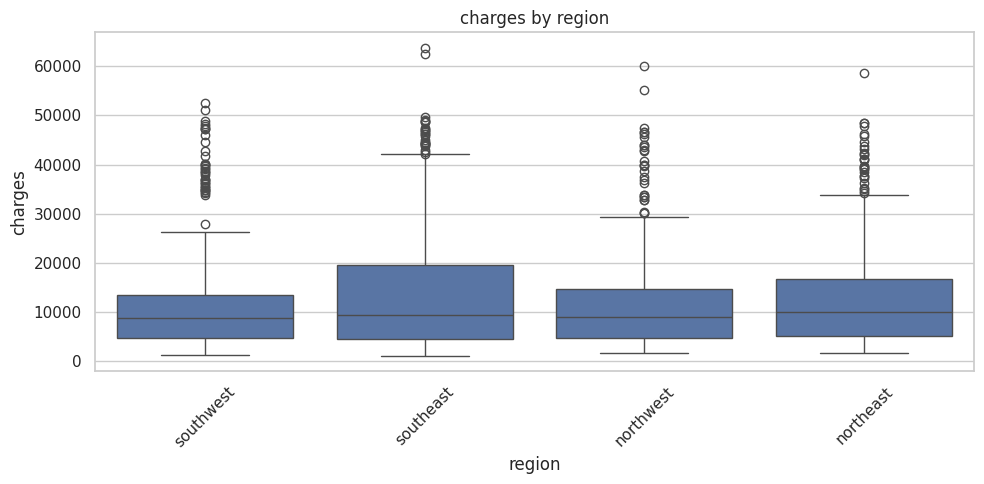

In [ ]:
def plot_against_target(df, target='charges'):
    sns.set(style="whitegrid")

    # Separate numerical and categorical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target, errors='ignore')
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    # Plot numerical features against target
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col], y=df[target], alpha=0.6)
        plt.title(f'{target} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

    # Plot categorical features against target
    for col in cat_cols:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df[col], y=df[target])
        plt.title(f'{target} by {col}')
        plt.xlabel(col)
        plt.ylabel(target)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


plot_against_target(df, target='charges')


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 1. Preprocessing
df = df.dropna()  # Optional: drop missing values if any

# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Handle categorical variables with one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling (IMPORTANT for SVMs)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train SVM regressor
svr = SVR(kernel='poly', C=1000, epsilon=0.005)
svr.fit(X_train_scaled, y_train)

# 5. Predictions
y_pred = svr.predict(X_test_scaled)

# 6. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 5444.30
R² Score: 0.81


In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create a new interaction feature


# Separate features and target
X = df.drop('charges', axis=1)
y = df['charges']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 25831862.60
R² Score: 0.83


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Separate features (X) and target (y)
X = df.drop('charges', axis=1)  # Assuming 'charges' is the target column
y = df['charges']

# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optionally, print feature importances
print("\nFeature Importances:")
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Mean Squared Error (MSE): 20942520.92
Root Mean Squared Error (RMSE): 4576.30
R² Score: 0.87

Feature Importances:
age: 0.1342
bmi: 0.2165
children: 0.0194
sex_male: 0.0064
smoker_yes: 0.6086
region_northwest: 0.0056
region_southeast: 0.0053
region_southwest: 0.0040


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
# # Create a new interaction feature
# df['age_bmi_interaction'] = df['age'] * df['bmi']

# # Optionally, drop the original 'age' and 'bmi' columns
# df = df.drop(['age', 'bmi'], axis=1)
# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize all the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVR': SVR(kernel='rbf', C=100, epsilon=0.1)
}

# Train and evaluate each model
for model_name, model in models.items():
    if model_name == 'SVR':  # Use scaled data for SVR
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  # Use raw data for other models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 50)


Model: Linear Regression
Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.78
--------------------------------------------------
Model: Random Forest
Mean Squared Error (MSE): 20942520.92
Root Mean Squared Error (RMSE): 4576.30
R² Score: 0.87
--------------------------------------------------
Model: Decision Tree
Mean Squared Error (MSE): 42446908.01
Root Mean Squared Error (RMSE): 6515.13
R² Score: 0.73
--------------------------------------------------
Model: SVR
Mean Squared Error (MSE): 117159516.09
Root Mean Squared Error (RMSE): 10824.02
R² Score: 0.25
--------------------------------------------------


In [ ]:
from sklearn.linear_model import LinearRegression

# Separate features (X) and target (y)
X = df.drop('charges', axis=1)  # Assuming 'charges' is the target column
y = df['charges']

# One-hot encode categorical features (if any)
X = pd.get_dummies(X, drop_first=True)
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multiple Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Optionally, print the model's coefficients (weights for each feature)
print("\nModel Coefficients (Weights):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Mean Squared Error (MSE): 33596915.85
Root Mean Squared Error (RMSE): 5796.28
R² Score: 0.78

Model Coefficients (Weights):
age: 256.9757
bmi: 337.0926
children: 425.2788
sex_male: -18.5917
smoker_yes: 23651.1289
region_northwest: -370.6773
region_southeast: -657.8643
region_southwest: -809.7994


In [ ]:


# Ensure all data is float (important for VIF)
X = X.astype(float)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF
print("\nVariance Inflation Factor (VIF):")
print(vif_data)



Variance Inflation Factor (VIF):
            feature        VIF
0               age   7.686965
1               bmi  11.358443
2          children   1.809930
3          sex_male   2.003185
4        smoker_yes   1.261233
5  region_northwest   1.890281
6  region_southeast   2.265564
7  region_southwest   1.960745


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = df.drop(['charges'], axis=1)
y = df['charges']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (scaling is important for neural networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1))  # Regression problem, single output node

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Neural Network RMSE: {rmse:.2f}")
print(f"Neural Network R² Score: {r2:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 313214432.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335158272.0000
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 316475552.0000
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 338047936.0000
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 302137472.0000
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 273378912.0000
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 234961696.0000
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 190186560.0000
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 132512912.0000
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 93989224.0000
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54514300.0000
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 47849112.0000
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45818024.0000
Epoch 14/100
34/34 ━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
# Assuming 'df' is your DataFrame and 'charges' is the target column
X = df.drop(['charges'], axis=1)
y = df['charges']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for Decision Trees in general, even though they are less sensitive)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 20, None],                      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                        # Minimum samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'],               # Number of features to consider for the best split
    'criterion': ['squared_error', 'absolute_error'],     # Updated: MSE and MAE
    'splitter': ['best', 'random'],                      # Strategy used to split nodes
    'max_leaf_nodes': [None, 10, 20],                     # Maximum number of leaf nodes
    'min_impurity_decrease': [0.0, 0.1, 0.2],            # Minimum decrease in impurity to make a split
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Best model after tuning hyperparameters
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
RMSE: 4525.44
R² Score: 0.87
